In [14]:
from tqdm import tqdm
import numpy as np
from udl import load_dataset
from udl.datasets.oxe.dataset_config import NormalizationType

common_config = {
    "base_dir": '/mnt/shared_data/dataset/dataset_tf_convt_v2',
    "min_traj_len": 30,
    "sample_length": 20,
    "padding": 0,
    "const_sample_interval_low": 3,
    "const_sample_interval_high": 3,
    "image_augment_strategy": "normal",
    "use_normalization": False,
    "load_camera_views": ["primary"],
    "resize_size": {"primary": [224, 224]},
    # "action_proprio_normalization_type": None,
}
dataset_train = load_dataset('bridge', common_config, is_train=True)

# Obtain action quantiles for construction action tokenizer
TOTAL_SAMPLES = 10

action_record = []
state_record = []
dataset_iter = iter(dataset_train)
for _ in tqdm(range(TOTAL_SAMPLES)):
    sample = next(dataset_iter)
    action_record.append(sample['action'])
    state_record.append(sample['state'])
actions = np.stack(action_record)
states = np.stack(state_record)

2025-02-10 02:53:13.500 | INFO     | udl.datasets.auto.auto_load:load_dataset_oxe_use_rlds:133 - Loading OXE dataset with RLDS


Computing statistics: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


######################################################################################
# Loading the following 1 datasets (incl. sampling weight):                         #
# bridge_dataset: ==========================================================1.000000 #
######################################################################################

2025-02-10 02:53:15.661 | INFO     | udl.datasets.oxe.make_dataset.utils.data:export_dataset_statistics:140 - Exported dataset stats to /home/chuheng/Jupyter/dataset_stats_train.csv



100%|██████████| 10/10 [00:37<00:00,  3.78s/it]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# RT-1

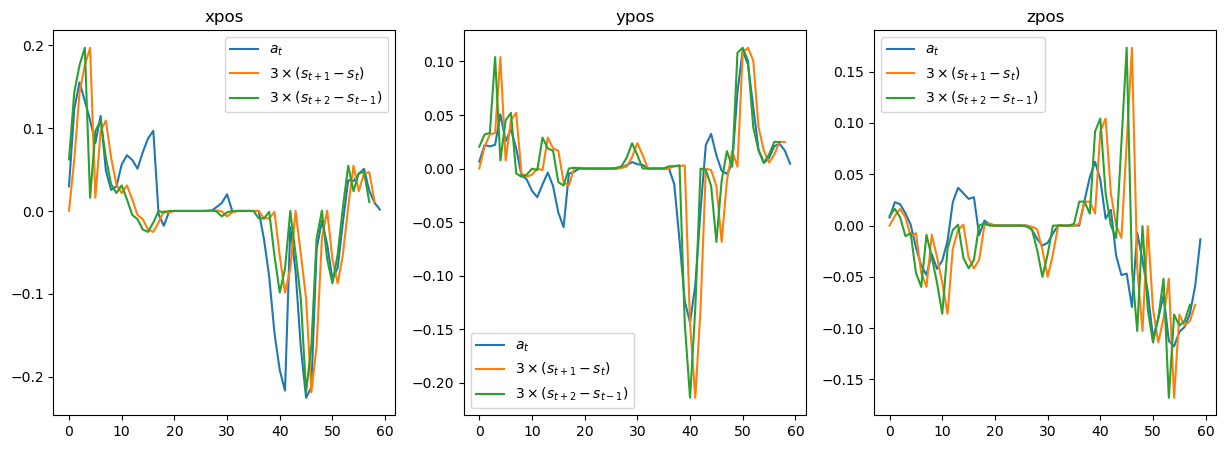

In [13]:
plt.figure(figsize=(15, 5))
for ind, title in zip([0, 1, 2], ['xpos', 'ypos', 'zpos']):
    plt.subplot(1, 3, ind+1)
    plt.plot(actions[0, :, ind], label=r'$a_t$')
    plt.plot((states[0, 1:, ind] - states[0, :-1, ind]) * 3, label=r'$3 \times (s_{t+1} - s_t)$')
    plt.plot((states[0, 2:, ind] - states[0, 1:-1, ind]) * 3, label=r'$3 \times (s_{t+2} - s_{t-1})$')
    plt.title(title)
    plt.legend()
plt.show()

# Bridge

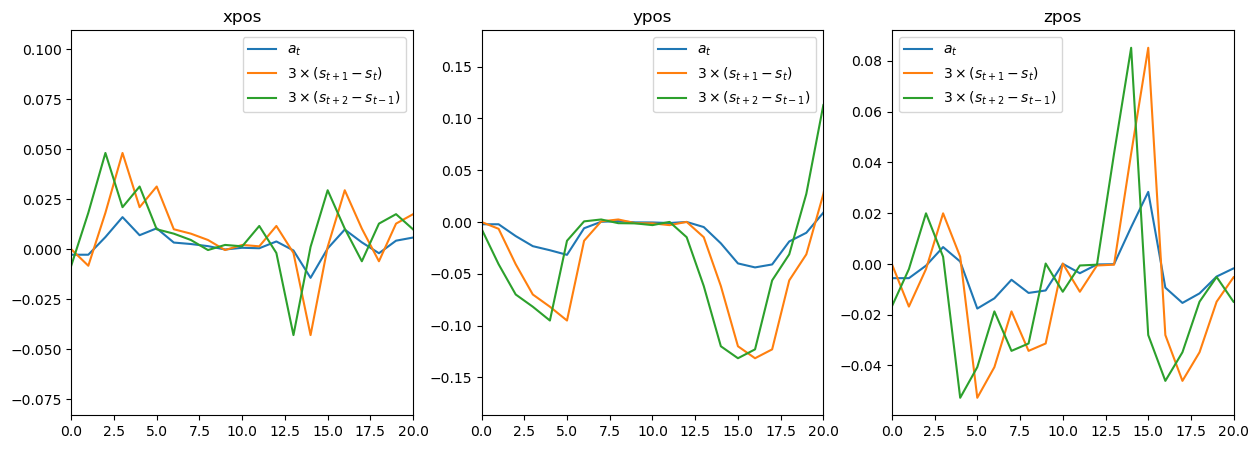

In [16]:
plt.figure(figsize=(15, 5))
for ind, title in zip([0, 1, 2], ['xpos', 'ypos', 'zpos']):
    plt.subplot(1, 3, ind+1)
    plt.plot(actions[0, :, ind], label=r'$a_t$')
    plt.plot((states[0, 1:, ind] - states[0, :-1, ind]) * 3, label=r'$3 \times (s_{t+1} - s_t)$')
    plt.plot((states[0, 2:, ind] - states[0, 1:-1, ind]) * 3, label=r'$3 \times (s_{t+2} - s_{t-1})$')
    plt.title(title)
    plt.xlim([0, 20])
    plt.legend()
plt.show()

In [9]:
data = {"/mnt/shared_data/chuheng/exp_pi/models/CogACT-Base/checkpoints/CogACT-Base.pt": {"l1_loss_xyz": 0.1931226496847118, "l1_loss_rot": 0.09780273146021871, "l1_loss_grp": 0.9476945131454286, "l1_loss": 0.26006723665431714}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-010000-epoch-35-loss=0.0104.pt": {"l1_loss_xyz": 0.12710179000452612, "l1_loss_rot": 0.010562035687752973, "l1_loss_grp": 0.2551128134969695, "l1_loss": 0.09544347008197239}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-020000-epoch-70-loss=0.0100.pt": {"l1_loss_xyz": 0.12881622552856656, "l1_loss_rot": 0.009732576612556732, "l1_loss_grp": 0.24346755117904362, "l1_loss": 0.09415913680034478}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-030000-epoch-106-loss=0.0096.pt": {"l1_loss_xyz": 0.12067591780661566, "l1_loss_rot": 0.010914929876534049, "l1_loss_grp": 0.30079242943812307, "l1_loss": 0.09936642464108175}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-040000-epoch-141-loss=0.0078.pt": {"l1_loss_xyz": 0.12378910256396193, "l1_loss_rot": 0.01034378416210417, "l1_loss_grp": 0.21915204717293874, "l1_loss": 0.08879295819301958}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-050000-epoch-177-loss=0.0058.pt": {"l1_loss_xyz": 0.12512939026515718, "l1_loss_rot": 0.009728510701579053, "l1_loss_grp": 0.2515727654522548, "l1_loss": 0.09373520976463764}}
import pandas as pd
data = pd.DataFrame(data).T
data.index = [0, 10, 20, 30, 40, 50]

<Axes: >

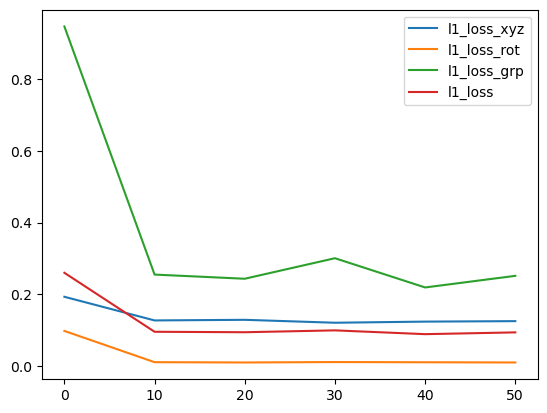

In [10]:
data.plot()

In [11]:
data = {"/mnt/shared_data/chuheng/exp_pi/models/CogACT-Base/checkpoints/CogACT-Base.pt": {"l1_loss_xyz": 0.19556855060594103, "l1_loss_rot": 0.09784162588116453, "l1_loss_grp": 0.967014557436849, "l1_loss": 0.26389215527116655}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-010000-epoch-35-loss=0.0104.pt": {"l1_loss_xyz": 0.1279816701749928, "l1_loss_rot": 0.01136806707324172, "l1_loss_grp": 0.27020642069828354, "l1_loss": 0.09832223320614102}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-020000-epoch-70-loss=0.0100.pt": {"l1_loss_xyz": 0.13029019224061153, "l1_loss_rot": 0.011564794899416782, "l1_loss_grp": 0.24105543827034406, "l1_loss": 0.09523148567006129}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-030000-epoch-106-loss=0.0096.pt": {"l1_loss_xyz": 0.12535032417250588, "l1_loss_rot": 0.009803546932139688, "l1_loss_grp": 0.29979425217879635, "l1_loss": 0.10075083792753328}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-040000-epoch-141-loss=0.0078.pt": {"l1_loss_xyz": 0.12529427916266656, "l1_loss_rot": 0.009807796665790652, "l1_loss_grp": 0.21100421165754552, "l1_loss": 0.08804434844898815}, "/mnt/shared_data/chuheng/exp_pi/exp250503_ft_cogact/exp250503_ft_cogact--image_aug/checkpoints/step-050000-epoch-177-loss=0.0058.pt": {"l1_loss_xyz": 0.12663933995932922, "l1_loss_rot": 0.010033974023979209, "l1_loss_grp": 0.24961614124158918, "l1_loss": 0.09423372617021636}}
import pandas as pd
data = pd.DataFrame(data).T
data.index = [0, 10, 20, 30, 40, 50]

<Axes: >

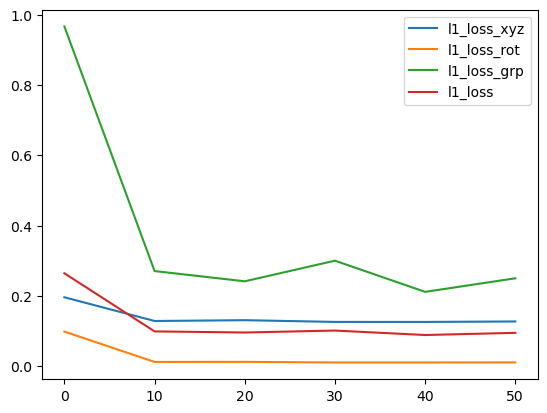

In [12]:
data.plot()